<a href="https://colab.research.google.com/github/Jihyun13579/ESAA/blob/main/1103(%EA%B8%88)_%EA%B3%BC%EC%A0%9C_%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%99%84%EB%B2%BD_%EA%B0%80%EC%9D%B4%EB%93%9C_ch8_7%2C_10_pg_516~528%2C_544~561_%ED%95%84%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1103(금) 과제_파이썬 머신러닝 완벽 가이드 ch8. 7, 10   pg. 516 ~ 528, 544 ~ 561 필사
### 2129014 박지현

# CH08. 텍스트 분석

## CH08.07. 문서 군집화 소개와 실습(Opinion Review 데이터 세트)

### 문서 군집화 개념(Document Clustering)
: 비슷한 텍스트 구성의 문서를 군집화(Clustering)하는 것
- cf. 텍스트 분류 기반의 문서 분류, but 지도학습의 텍스트 분류 기반의 문서 분류에 반해, 학습 데이터 세트가 필요 없는 비지도학습 기반 문서 군집화


### Opinion Review 데이터 세트를 이용한 문서 군집화 수행하기

Opinion Review 데이터 세트
- 51개의 텍스트 파일
- Tripadvisor(호텔), Edmund.com(자동차), Amazon.com(전자제품) 사이트에서 가져온 리뷰 문서
- 각 문서 : 약 100개 정도의 문장

1. 데이터 읽어오기
해당 디렉터리 내의 모든 파일에 대해 각각 for 반복문으로 반복 > 개별 파일명을 파일명 리스트에 추가 / 개별 파일은 DataFrame으로 읽은 후 다시 문자열로 반홥 후 파일 내용에 추가 > 이렇게 만들어진 파일명 리스트와 파일 내용 리스트를 이용해 새롭게 파일명과 파일 내용을 칼럼으로 가지는 DataFrame 생성

In [1]:
import pandas as pd
import glob, os

# 다음은 저자의 컴퓨터에서 압축 파일을 풀어놓은 디렉터리이니, 각자 디렉터리를 다시 설정합니다.
path = "/content/topics"
# path로 지정한 디렉터리 밑에 있는 모든 .data 파일의 파일명을 리스트로 취합
all_files = glob.glob(os.path.join(path, "*.data"))
filename_list = []
opinion_text = []

# 개별 파일의 파일명은 filename_list로 취합,
# 개별 파일의 파일 내용은 DataFrame 로딩 후 다시 string으로 변환해 opinion_text list로 취합
for file_ in all_files:
    # 개별 파일을 읽어서 DataFrame으로 생성
    df = pd.read_table(file_, index_col=None, header=0, encoding='latin1')

    # 절대 경로로 주어진 파일명을 가공. 리눅스에서 수행할 때는 다음\\를 /로 변경.
    # 맨 마지막 .data 확장자도 제거
    filename_ = file_.split('\\')[-1]
    filename = filename_.split('.')[0]

    # 파일명 list와 파일 내용 list에 파일명과 파일 내용을 추가.
    filename_list.append(filename)
    opinion_text.append(df.to_string())

# 파일명 list와 파일 내용 list 객체를 DataFrame으로 생성
document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})
document_df.head()

,filename,opinion_text
0,/content/topics/keyboard_netbook_1005ha,...
1,/content/topics/staff_swissotel_chicago,...
2,/content/topics/food_swissotel_chicago,...
3,/content/topics/rooms_swissotel_chicago,...
4,/content/topics/performance_netbook_1005ha,...


> 각 파일 이름(filename) 자체만으로 의견(opinion)의 텍스트(text)가 어떠한 제품/서비스에 대한 리뷰인지 잘 알 수 O

2. 문서를 TF-IDF 형태로 피처 벡터화하기
- tokenizer : LemNormalize() 함수 이용
- 피처의 개수 제한 : min_df, max_df 범위 설정
- fidf_vect.fit_transform(document_df['opinion_text']) > 개별 문서 텍스트에 대해 TF-IDF 변환된 피처 벡터화된 행렬 구할 수 O

In [2]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

# 단어 원형 추출 함수
lemmar = WordNetLemmatizer()
def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

# 특수 문자 사전 생성: {33: None ...}
# ord(): 아스키 코드 생성
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)

# 특수 문자 제거 및 단어 원형 추출
def LemNormalize(text):
    # 텍스트 소문자 변경 후 특수 문자 제거
    text_new = text.lower().translate(remove_punct_dict)

    # 단어 토큰화
    word_tokens = nltk.word_tokenize(text_new)

    # 단어 원형 추출
    return LemTokens(word_tokens)

In [3]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english',
                             ngram_range=(1,2), min_df=0.05, max_df=0.85)
# opinion_text 칼럼 값으로 피처 벡터화 수행
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(


3. 문서별 텍스트가 TF-IDF 변환된 피처 벡터화 행렬 데이터에 대해서 군집화를 수행하기 > 어떤 문서끼리 군집되는지 확인해보기
- 군집화 기법 : K-평균 > 군집의 Label 값, 중심별로 할당된 데이터 세트의 좌표 값 구하기
- 문서의 유형: 전자제품(네비게이션, 아이팟, 킨들, 랩탑 컴퓨터 등...)/자동차/호텔
- 5개의 중심(Centroid) 기반, 최대 반복 횟수 10000

In [5]:
from sklearn.cluster import KMeans

# 5개 집합으로 군집화 수행.
km_cluster = KMeans(n_clusters=5, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


4. 각 데이터별로 할당된 군집의 레이블을 파일명과 파일 내용을 해당 DataFrame 'cluster_label' 칼럼 추가해 저장하기
- 군집이 각 주제별로 유사한 형태로 잘 구성되었는가?

In [6]:
document_df['cluster_label'] = cluster_label
document_df.head()

,filename,opinion_text,cluster_label
0,/content/topics/keyboard_netbook_1005ha,...,4
1,/content/topics/staff_swissotel_chicago,...,0
2,/content/topics/food_swissotel_chicago,...,2
3,/content/topics/rooms_swissotel_chicago,...,0
4,/content/topics/performance_netbook_1005ha,...,4


4-1.각 cluster_label 별로 filename 정렬하여 군집 구성 확인하기

In [7]:
document_df[document_df['cluster_label']==0].sort_values(by='filename')

,filename,opinion_text,cluster_label
36,/content/topics/bathroom_bestwestern_hotel_sfo,...,0
22,/content/topics/free_bestwestern_hotel_sfo,...,0
43,/content/topics/location_bestwestern_hotel_sfo,...,0
41,/content/topics/location_holiday_inn_london,...,0
24,/content/topics/parking_bestwestern_hotel_sfo,...,0
11,/content/topics/price_amazon_kindle,...,0
17,/content/topics/price_holiday_inn_london,...,0
37,/content/topics/room_holiday_inn_london,...,0
50,/content/topics/rooms_bestwestern_hotel_sfo,...,0
3,/content/topics/rooms_swissotel_chicago,...,0


> cluster #0 : 호텔에 대한 리뷰로 군집화됨

In [8]:
document_df[document_df['cluster_label']==1].sort_values(by='filename')

,filename,opinion_text,cluster_label
14,/content/topics/accuracy_garmin_nuvi_255W_gps,...,1
35,/content/topics/directions_garmin_nuvi_255W_gps,...,1
34,/content/topics/display_garmin_nuvi_255W_gps,...,1
5,/content/topics/fonts_amazon_kindle,...,1
19,/content/topics/satellite_garmin_nuvi_255W_gps,...,1
44,/content/topics/speed_garmin_nuvi_255W_gps,...,1
39,/content/topics/updates_garmin_nuvi_255W_gps,...,1


> cluster #1 : 킨들, 아이팟, 넷북 등의 포터블 전자기기에 대한 리뷰로 군집화됨

In [9]:
document_df[document_df['cluster_label']==2].sort_values(by='filename')

,filename,opinion_text,cluster_label
20,/content/topics/food_holiday_inn_london,...,2
2,/content/topics/food_swissotel_chicago,...,2
21,/content/topics/service_bestwestern_hotel_sfo,...,2
42,/content/topics/service_holiday_inn_london,...,2
9,/content/topics/service_swissotel_hotel_chicago,...,2


> cluster #2 : cluster #1과 비슷하게 킨들, 아이팟, 넷북 등 군집에 포함, but 주로 차량용 네비게이션으로 군집화됨

In [10]:
document_df[document_df['cluster_label']==3].sort_values(by='filename')

,filename,opinion_text,cluster_label
10,/content/topics/comfort_honda_accord_2008,...,3
8,/content/topics/comfort_toyota_camry_2007,...,3
46,/content/topics/gas_mileage_toyota_camry_2007,...,3
15,/content/topics/interior_honda_accord_2008,...,3
27,/content/topics/interior_toyota_camry_2007,...,3
26,/content/topics/mileage_honda_accord_2008,...,3
23,/content/topics/performance_honda_accord_2008,...,3
28,/content/topics/quality_toyota_camry_2007,...,3
13,/content/topics/seats_honda_accord_2008,...,3
47,/content/topics/transmission_toyota_camry_2007,...,3


> cluster #3 : 킨들 리뷰가 1개 포함, but cluster #0과 같이 대부분 호텔에 대한 리뷰로 군집화됨

In [11]:
document_df[document_df['cluster_label']==4].sort_values(by='filename')

,filename,opinion_text,cluster_label
33,/content/topics/battery-life_amazon_kindle,...,4
31,/content/topics/battery-life_ipod_nano_8gb,...,4
45,/content/topics/battery-life_netbook_1005ha,...,4
49,/content/topics/buttons_amazon_kindle,...,4
40,/content/topics/eyesight-issues_amazon_kindle,...,4
7,/content/topics/features_windows7,...,4
0,/content/topics/keyboard_netbook_1005ha,...,4
29,/content/topics/navigation_amazon_kindle,...,4
4,/content/topics/performance_netbook_1005ha,...,4
16,/content/topics/screen_garmin_nuvi_255W_gps,...,4


> cluster #4 : 대부분 자동차에 대한 리뷰로 군집화됨

5. 중심 개수 5개>3개로 낮춰서 3개 그룹으로 군집화한 뒤 결과 확인해보기
- 위에서 전반적으로 군집화된 결과 : 군집 개수가 약간 많게 설정되어 있어 세분화되어 군집화된 경향

In [12]:
from sklearn.cluster import KMeans

# 3개의 집합으로 군집화
km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

# 소속 군집을 cluster_label 칼럼으로 할당하고 cluster_label 값으로 정렬
document_df['cluster_label'] = cluster_label
document_df.sort_values(by='cluster_label')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,filename,opinion_text,cluster_label
50,/content/topics/rooms_bestwestern_hotel_sfo,...,0
36,/content/topics/bathroom_bestwestern_hotel_sfo,...,0
30,/content/topics/staff_bestwestern_hotel_sfo,...,0
37,/content/topics/room_holiday_inn_london,...,0
24,/content/topics/parking_bestwestern_hotel_sfo,...,0
22,/content/topics/free_bestwestern_hotel_sfo,...,0
21,/content/topics/service_bestwestern_hotel_sfo,...,0
20,/content/topics/food_holiday_inn_london,...,0
17,/content/topics/price_holiday_inn_london,...,0
42,/content/topics/service_holiday_inn_london,...,0


> 결과 요약 : > 각각의 cluster 포터블 전자기기/호텔/자동차에 대한 리뷰로 각각 잘 군집화됨

### 군집별 핵심 단어 추출하기
- 각 군집(Cluster)에 속한 문서는 핵심 단어를 주축으로 군집화되어 있을 것 > **각 군집을 구성하는 핵심 단어가 어떤 적이 있는지 확인해보기**

1. 군집 3개로 생성한 KMeans 객체인 km_cluster에서 cluster_centers_ 속성값 가져온 뒤 값 확인해보기
- KMeans 객체의 cluster_centers_ 속성 : 각 군집을 구성하는 단어 피처가 군집의 중심(Centroid)을 기준으로 얼마나 가깝게 위치해 있는지 배열 값으로 제공
 - 행: 개별 군집 / 열: 개별 피처
 - 각 배열 내의 값 : 개별 군집 내의 상대 위치를 숫자 값으로 표현한 일종의 좌표 값

In [13]:
cluster_centers = km_cluster.cluster_centers_
print('cluster_centers shape:', cluster_centers.shape)
print(cluster_centers)

cluster_centers shape: (3, 4611)
[[0.         0.00099499 0.00174637 ... 0.         0.00183397 0.00144581]
 [0.         0.00092551 0.         ... 0.         0.         0.        ]
 [0.01005322 0.         0.         ... 0.00706287 0.         0.        ]]


> - cluster_centers shape : (3, 4611) 배열 > 군집 3개, word 피처 4611개로 구성되어 있음
- 각 행의 배열 값 : 각 군집 내의 6411개 피처의 위치가 개별 중심과 얼마나 가까운가를 상대 값으로 나타낸 것
 - 0~1, 1에 가까울수록 중심과 가까운 값

2. cluster_centers_ 속성값을 이용해 각 군집별 핵심 단어 찾아보기
- cluster_centers_ 속성 : 넘파이의 ndarray
 - argsort()[:, ::-1] : cluster_centers_ 배열 내 값이 큰 순으로 정렬된 위치 인덱스 값 반환함 > 위치 인덱스 이용해 핵심 단어 피처 이름 출력

- get_cluster_details() 함수 생성하기 : 위의 역할 수행
 - 주요 로직: cluster_centers_ 배열 내에서 가장 값이 큰 데이터의 위치 인덱스 추출 > 핵심 단어 이름과 그때의 상대 위치 값 추출 > cluster_details의 Dict 객체 변수에 기록하고 반환

In [14]:
# 군집별 top n 핵심 단어, 그 단어의 중심 위치 상댓값, 대상 파일명을 반환함
def get_cluster_details(cluster_model, cluster_data, feature_names, clusters_num, top_n_features=10):
  cluster_details = {}

  # cluster_centers array 값이 큰 순으로 정렬된 인덱스 값을 반환
  # 군집 중심점 별 할당된 word 피처들의 거리값이 큰 순으로 값을 구하기 위함
  centroid_feature_ordered_ind = cluster_model.cluster_centers_.argsort()[:, ::-1]

  # 개별 군집별로 반복하며 핵심 단어, 그 단어의 중심 위치 상댓값, 대상 파일명 입력
  for cluster_num in range(clusters_num):
    # 개별 군집별 정보를 담을 데이터 초기화
    cluster_details[cluster_num] = {}
    cluster_details[cluster_num]['cluster'] = cluster_num

    # cluster_centers_.argsort()로 구한 인덱스를 이용해 top n 피처 단어를 구함
    top_feature_indexes = centroid_feature_ordered_ind[cluster_num, :top_n_features]
    top_features = [feature_names[ind] for ind in top_feature_indexes]

    # top_feature_indexes를 이용해 해당 피처 단어의 중심 위치 상댓값 구함
    top_feature_values = cluster_model.cluster_centers_[cluster_num, top_feature_indexes].tolist()

    # cluster_details 딕셔너리 객체에 개별 군집별 핵심단어와 중심위치 상댓값, 해당 파일명 입력
    cluster_details[cluster_num]['top_features'] = top_features
    cluster_details[cluster_num]['top_features_value'] = top_feature_values
    filenames = cluster_data[cluster_data['cluster_label']==cluster_num]['filename']
    filenames = filenames.values.tolist()

    cluster_details[cluster_num]['filenames'] = filenames

  return cluster_details

> get_cluster_details() 호출 시 dictionary 원소로 가지는 리스트 cluster_details 반환

3. cluster_details의 개별 군집번호, 핵심 단어, 핵심단어 중심 위치 상댓값, 파일명 속성 값 정보를 보기 좋게 표현하기 위한 print_cluster_details() 함수 생성하기

In [15]:
def print_cluster_details(cluster_details):
  for cluster_num, cluster_detail in cluster_details.items():
    print('##### Cluster {0}'.format(cluster_num))
    print('Top features:', cluster_detail['top_features'])
    print('reviews 파일명:', cluster_detail['filenames'][:7])
    print('==============================================')

4. 위에서 생성한 get_cluster_details(), print_cluster_details() 호출하여 핵심단어 추출하기

In [16]:
feature_names = tfidf_vect.get_feature_names_out()
cluster_details = get_cluster_details(cluster_model = km_cluster, cluster_data = document_df,
                                      feature_names = feature_names, clusters_num = 3, top_n_features = 10)
print_cluster_details(cluster_details)

##### Cluster 0
Top features: ['room', 'hotel', 'service', 'staff', 'food', 'location', 'bathroom', 'clean', 'price', 'parking']
reviews 파일명: ['/content/topics/staff_swissotel_chicago', '/content/topics/food_swissotel_chicago', '/content/topics/rooms_swissotel_chicago', '/content/topics/service_swissotel_hotel_chicago', '/content/topics/price_holiday_inn_london', '/content/topics/food_holiday_inn_london', '/content/topics/service_bestwestern_hotel_sfo']
##### Cluster 1
Top features: ['interior', 'seat', 'mileage', 'comfortable', 'gas', 'gas mileage', 'transmission', 'car', 'performance', 'quality']
reviews 파일명: ['/content/topics/comfort_toyota_camry_2007', '/content/topics/comfort_honda_accord_2008', '/content/topics/seats_honda_accord_2008', '/content/topics/interior_honda_accord_2008', '/content/topics/performance_honda_accord_2008', '/content/topics/mileage_honda_accord_2008', '/content/topics/interior_toyota_camry_2007']
##### Cluster 2
Top features: ['screen', 'battery', 'keyboard

## CH08.10. 텍스트 분석 실습 - 캐글 Mercari Price Suggestion Challenge

### 데이터 전처리

In [35]:
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd

In [36]:
from google.colab import drive
drive.mount('/content/gdrive/')

file_path = "/content/gdrive/My Drive/Colab Notebooks/ESAA 학회_OB/mercari_data/"

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [37]:
mercari_df = pd.read_csv(file_path + 'train.tsv', sep='\t')
print(mercari_df.shape)
mercari_df.head(3)

(1482535, 8)


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & Parts,Razer,52.0,0,This keyboard is in great condition and works like it came out of the box. All of the ports are tested and work perfectly. The lights are customizable via the Razer Synapse app on your PC.
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,"Adorable top with a hint of lace and a key hole in the back! The pale pink is a 1X, and I also have a 3X available in white!"


In [38]:
print(mercari_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1482535 non-null  int64  
 1   name               1482535 non-null  object 
 2   item_condition_id  1482535 non-null  int64  
 3   category_name      1476208 non-null  object 
 4   brand_name         849853 non-null   object 
 5   price              1482535 non-null  float64
 6   shipping           1482535 non-null  int64  
 7   item_description   1482531 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB
None


<ipython-input-39-517835de25a0>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train_df, kde=False)


<Axes: xlabel='price'>

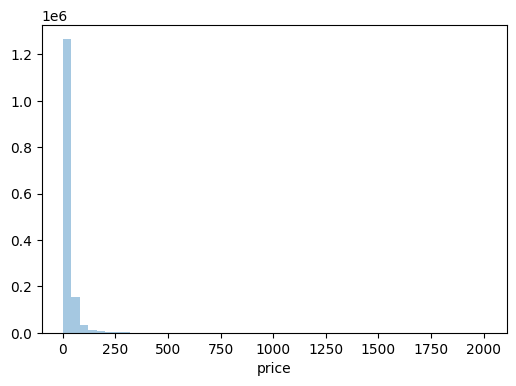

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

y_train_df = mercari_df['price']
plt.figure(figsize=(6, 4))
sns.distplot(y_train_df, kde=False)

<ipython-input-40-73f0fb165241>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train_df, kde=False)


<Axes: xlabel='price'>

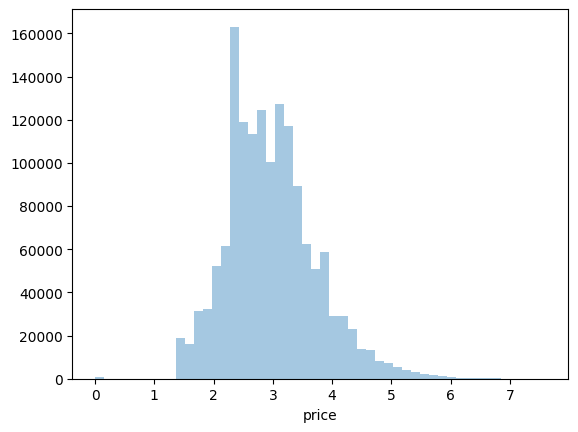

In [40]:
import numpy as np

y_train_df = np.log1p(y_train_df)
sns.distplot(y_train_df, kde=False)

In [41]:
mercari_df['price'] = np.log1p(mercari_df['price'])
mercari_df['price'].head(3)

0    2.397895
1    3.970292
2    2.397895
Name: price, dtype: float64

In [42]:
print('Shipping 값 유형:\n', mercari_df['shipping'].value_counts())
print('item_condition_id 값 유형:\n', mercari_df['item_condition_id'].value_counts())

Shipping 값 유형:
 0    819435
1    663100
Name: shipping, dtype: int64
item_condition_id 값 유형:
 1    640549
3    432161
2    375479
4     31962
5      2384
Name: item_condition_id, dtype: int64


In [43]:
boolean_cond = mercari_df['item_description'] == 'No description yet'
mercari_df[boolean_cond]['item_description'].count()

82489

In [44]:
# apply lambda에서 호출되는 대, 중, 소 분할 함수 생성, 대, 중, 소 값을 리스트로 반환
def split_cat(category_name):
  try:
    return category_name.split('/')
  except:
    return ['Other_Null', 'Other_Null', 'Other_Null']

# 위의 split_cat()을 apply lambda에서 호출해 대, 중, 소 칼럼을 mercari_df에 생성
mercari_df['cat_dae'], mercari_df['cat_jung'], mercari_df['cat_so'] = zip(*mercari_df['category_name'].apply(lambda x: split_cat(x)))

# 대분류만 값의 유형과 건수를 살펴보고, 중분류, 소분류는 값의 유형이 많으므로 분류 개수만 추출
print('대분류 유형:\n', mercari_df['cat_dae'].value_counts())
print('중분류 개수:', mercari_df['cat_jung'].nunique())
print('소분류 개수:', mercari_df['cat_so'].nunique())

대분류 유형:
 Women                     664385
Beauty                    207828
Kids                      171689
Electronics               122690
Men                        93680
Home                       67871
Vintage & Collectibles     46530
Other                      45351
Handmade                   30842
Sports & Outdoors          25342
Other_Null                  6327
Name: cat_dae, dtype: int64
중분류 개수: 114
소분류 개수: 871


In [45]:
mercari_df['brand_name'] = mercari_df['brand_name'].fillna(value='Other_Null')
mercari_df['category_name'] = mercari_df['category_name'].fillna(value='Other_Null')
mercari_df['item_description'] = mercari_df['item_description'].fillna(value='Other_Null')

In [46]:
# 각 칼럼별로 Null 값 건수 확인, 모두 0이 나와야 합니다.
mercari_df.isnull().sum()

train_id             0
name                 0
item_condition_id    0
category_name        0
brand_name           0
price                0
shipping             0
item_description     0
cat_dae              0
cat_jung             0
cat_so               0
dtype: int64

### 피처 인코딩과 피처 벡터화

In [47]:
print('brand name의 유형 건수 :', mercari_df['brand_name'].nunique())
print('brand name sample 5건 : \n', mercari_df['brand_name'].value_counts()[:5])

brand name의 유형 건수 : 4810
brand name sample 5건 : 
 Other_Null           632682
PINK                  54088
Nike                  54043
Victoria's Secret     48036
LuLaRoe               31024
Name: brand_name, dtype: int64


In [48]:
print('name의 종류 개수 :', mercari_df['name'].nunique())
print('name sample 10건 : \n', mercari_df['name'][:10])

name의 종류 개수 : 1225273
name sample 10건 : 
 0       MLB Cincinnati Reds T Shirt Size XL
1          Razer BlackWidow Chroma Keyboard
2                            AVA-VIV Blouse
3                     Leather Horse Statues
4                      24K GOLD plated rose
5          Bundled items requested for Ruie
6        Acacia pacific tides santorini top
7      Girls cheer and tumbling bundle of 7
8                     Girls Nike Pro shorts
9    Porcelain clown doll checker pants VTG
Name: name, dtype: object


In [49]:
pd.set_option('max_colwidth', 200)

# item_description의 평균 문자열 크기
print('item_description 평균 문자열 크기:', mercari_df['item_description'].str.len().mean())

mercari_df['item_description'][:2]

item_description 평균 문자열 크기: 145.7113889385411


0                                                                                                                                                                              No description yet
1    This keyboard is in great condition and works like it came out of the box. All of the ports are tested and work perfectly. The lights are customizable via the Razer Synapse app on your PC.
Name: item_description, dtype: object

In [50]:
# name 속성에 대한 피처 벡터화 변환
cnt_vec = CountVectorizer()
X_name = cnt_vec.fit_transform(mercari_df.name)

# item_description에 대한 피처 벡터화 변환
tfidf_descp = TfidfVectorizer(max_features = 50000, ngram_range=(1, 3), stop_words='english')
X_descp = tfidf_descp.fit_transform(mercari_df['item_description'])

print('name vectorization shape:', X_name.shape)
print('item_description vectorization shape:', X_descp.shape)

name vectorization shape: (1482535, 105757)
item_description vectorization shape: (1482535, 50000)


In [51]:
from sklearn.preprocessing import LabelBinarizer

# brand_name, item_condition_id, shipping 각 피처들을 희소 행렬 원-핫 인코딩 변환
lb_brand_name = LabelBinarizer(sparse_output=True)
X_brand = lb_brand_name.fit_transform(mercari_df['brand_name'])
lb_item_cond_id = LabelBinarizer(sparse_output=True)
X_item_cond_id = lb_item_cond_id.fit_transform(mercari_df['item_condition_id'])
lb_shipping = LabelBinarizer(sparse_output=True)
X_shipping = lb_shipping.fit_transform(mercari_df['shipping'])

# cat_dae, cat_jung, cat_so 각 피처들을 희소 행렬 원-핫 인코딩 변환
lb_cat_dae = LabelBinarizer(sparse_output=True)
X_cat_dae= lb_cat_dae.fit_transform(mercari_df['cat_dae'])
lb_cat_jung = LabelBinarizer(sparse_output=True)
X_cat_jung = lb_cat_jung.fit_transform(mercari_df['cat_jung'])
lb_cat_so = LabelBinarizer(sparse_output=True)
X_cat_so = lb_cat_so.fit_transform(mercari_df['cat_so'])

In [52]:
print(type(X_brand), type(X_item_cond_id), type(X_shipping))
print('X_brand_shape:{0}, X_item_cond_id shape:{1}'.format(X_brand.shape, X_item_cond_id.shape))
print('X_shipping shape:{0}, X_cat_dae shape:{1}'.format(X_shipping.shape, X_cat_dae.shape))
print('X_cat_jung shape:{0}, X_cat_so shape:{1}'.format(X_cat_jung.shape, X_cat_so.shape))

<class 'scipy.sparse._csr.csr_matrix'> <class 'scipy.sparse._csr.csr_matrix'> <class 'scipy.sparse._csr.csr_matrix'>
X_brand_shape:(1482535, 4810), X_item_cond_id shape:(1482535, 5)
X_shipping shape:(1482535, 1), X_cat_dae shape:(1482535, 11)
X_cat_jung shape:(1482535, 114), X_cat_so shape:(1482535, 871)


In [53]:
from scipy.sparse import hstack
import gc

sparse_matrix_list = (X_name, X_descp, X_brand, X_item_cond_id,
                      X_shipping, X_cat_dae, X_cat_jung, X_cat_so)

# hstack 함수를 이용해 인코딩과 벡터화를 수행한 데이터 세트를 모두 결합.
X_features_sparse = hstack(sparse_matrix_list).tocsr()
print(type(X_features_sparse), X_features_sparse.shape)

# 데이터 세트가 메모리를 많이 차지하므로 사용 목적이 끝났으면 바로 메모리에서 삭제.
del X_features_sparse
gc.collect()

<class 'scipy.sparse._csr.csr_matrix'> (1482535, 161569)


0

### 릿지 회귀 모델 구축 및 평가

In [54]:
def rmsle(y, y_pred):
  # underflow, overflow를 막기 위해 log가 아닌 log1p로 rmsle 계산
  return np.sqrt(np.mean(np.power(np.log1p(y) - np.log1p(y_pred), 2)))

def evaluate_org_price(y_test, preds):

  # 원본 데이터는 log1p로 변환되었으므로 exmpm1로 원복 필요.
  preds_exmpm = np.expm1(preds)
  y_test_exmpm = np.expm1(y_test)

  # rmsle로 RMSLE 값 추출
  rmsle_result = rmsle(y_test_exmpm, preds_exmpm)
  return rmsle_result

In [55]:
import gc
from scipy.sparse import hstack

def model_train_predict(model, matrix_list):
  # scipy.sparse 모듈의 hstack을 이용해 희소 행렬 결합
  X = hstack(matrix_list).tocsr()

  X_train, X_test, y_train, y_test = train_test_split(X, mercari_df['price'], test_size=0.2, random_state=156)

  # 모델 학습 및 예측
  model.fit(X_train, y_train)
  preds = model.predict(X_test)

  del X, X_train, X_test, y_train
  gc.collect()

  return preds, y_test

In [56]:
linear_model = Ridge(solver='lsqr', fit_intercept=False)

sparse_matrix_list = (X_name, X_brand, X_item_cond_id, X_shipping, X_cat_dae, X_cat_jung, X_cat_so)
linear_preds, y_test = model_train_predict(model=linear_model, matrix_list=sparse_matrix_list)
print('Item Description을 제외했을 때 rmsle 값:', evaluate_org_price(y_test, linear_preds))

sparse_matrix_list = (X_descp, X_name, X_brand, X_item_cond_id, X_shipping, X_cat_dae, X_cat_jung, X_cat_so)
linear_preds, y_test = model_train_predict(model=linear_model, matrix_list = sparse_matrix_list)
print('Item Description을 포함한 rmsle 값:', evaluate_org_price(y_test, linear_preds))

Item Description을 제외했을 때 rmsle 값: 0.4983990938999374
Item Description을 포함한 rmsle 값: 0.4680329023962086


### LightGBM 회귀 모델 구축과 앙상블을 이용한 최종 예측 평가

In [ ]:
from lightgbm import LGBMRegressor

sparse_matrix_list = (X_descp, X_name, X_brand, X_item_cond_id,
                      X_shipping, X_cat_dae, X_cat_jung, X_cat_so)

lgbm_model = LGBMRegressor(n_estimators=200, learning_rate=0.5, num_leaves=125, random_state=156)
lgbm_preds , y_test = model_train_predict(model = lgbm_model , matrix_list=sparse_matrix_list)
print('LightGBM rmsle 값:',  evaluate_org_price(y_test , lgbm_preds))

In [ ]:
preds = lgbm_preds * 0.45 + linear_preds * 0.55
print('LightGBM과 Ridge를 ensemble한 최종 rmsle 값:',  evaluate_org_price(y_test, preds))

## CH08.11. 정리